<center>
<img src="http://image.yes24.com/goods/87039632/800x0" width="200" height="200"><br>
</center>


 - Github: [yoonkt200](https://github.com/yoonkt200/python-data-analysis)

# Chapter 03 미래를 예측하는 데이터 분석

#### 이 장의 핵심 개념
- 지도 학습과 비지도 학습의 개념을 이해한다.
- 회귀 분석으로 예측을 수행한다.
- 시계열 데이터의 트렌드를 예측한다.
- 수학적 기법을 활용하여 평점을 예측한다.

### 3-1 프로야구 선수의 다음 해 연봉 예측하기

### Step1 탐색: 프로야구 연봉 데이터 살펴보기

예제에서 살용할 연봉 데이터셋의 기본 정보를 살펴보자. 데이터의 기초 탐색결과는 다음과 같다. 프로야구 연봉 데이터셋은 총 152개이며, 22개 피처로 구성되어 있다. 이 22개의 피처는 선수가 가지고 있는 기록(승,패,홈런 등의 수치)들에 대한 세부 정보를 나타낸다.

- 프로야구 연봉 데이터셋의 기본 정보 구하기

In [116]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Source: http://www.statiz.co.kr/

picher_file_path = './data/picher_stats_2017.csv'
batter_file_path = './data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [117]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [118]:
print(picher.shape)

(152, 22)


이번 예제에서 예측할 회귀 분석의 목표(Y값)는 데이터 '연봉(2018)'피처 이다. 다음 코드는 이를 히스토 그램 상자 그림(Box Plot)으로 시각화 한 것이다.

- 예측할 대상인 '연봉'에 대한 정보

In [119]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

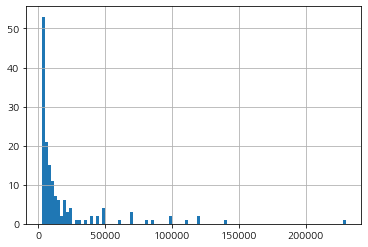

In [120]:
picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력한다.

<AxesSubplot:>

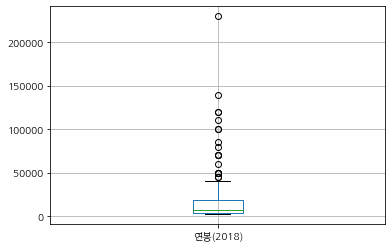

In [121]:
picher.boxplot(column=['연봉(2018)']) # 연봉의 상자 그림을 출력한다.

히스토그램에서는 연봉의 분포를 파악할 수 있으며, 상자 그림에서는 연봉의 일반적인 범주를 파악 할 수 있다. 흔히 말하는 '수십억대 연봉'을 받는 프로 선수는 별로 많지 않으며, 5억 원 미만의 연보잉 일반적으로 보인다. 다음으로 각각의 피처들은 어떤 특성을 가지고 있는지 살펴보자. 아래의 실행 결과는 '선수명'이나 '팀명'과 같이 그래프로 표현할 수 없는 피처들을 제외한 뒤, 모든 수치형 피처의 분포를 시각화한 것이다. 이를 통해 몇몇 피처들은 매우 불균형한 분포를 가지고 있다는 것을 알 수 있다.

- 회귀 분석에 사용할 피처 살펴보기

In [122]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


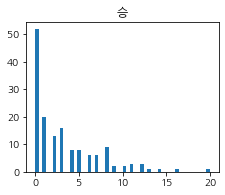

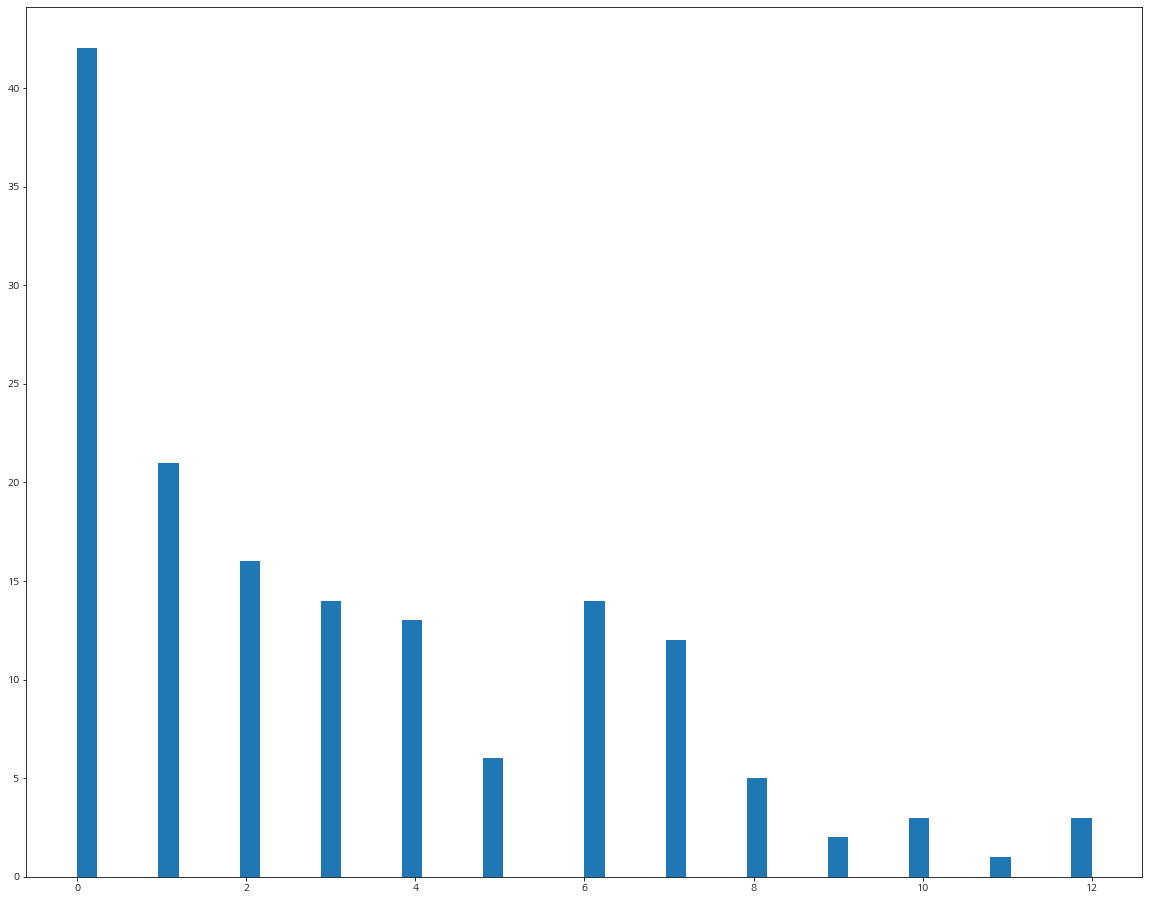

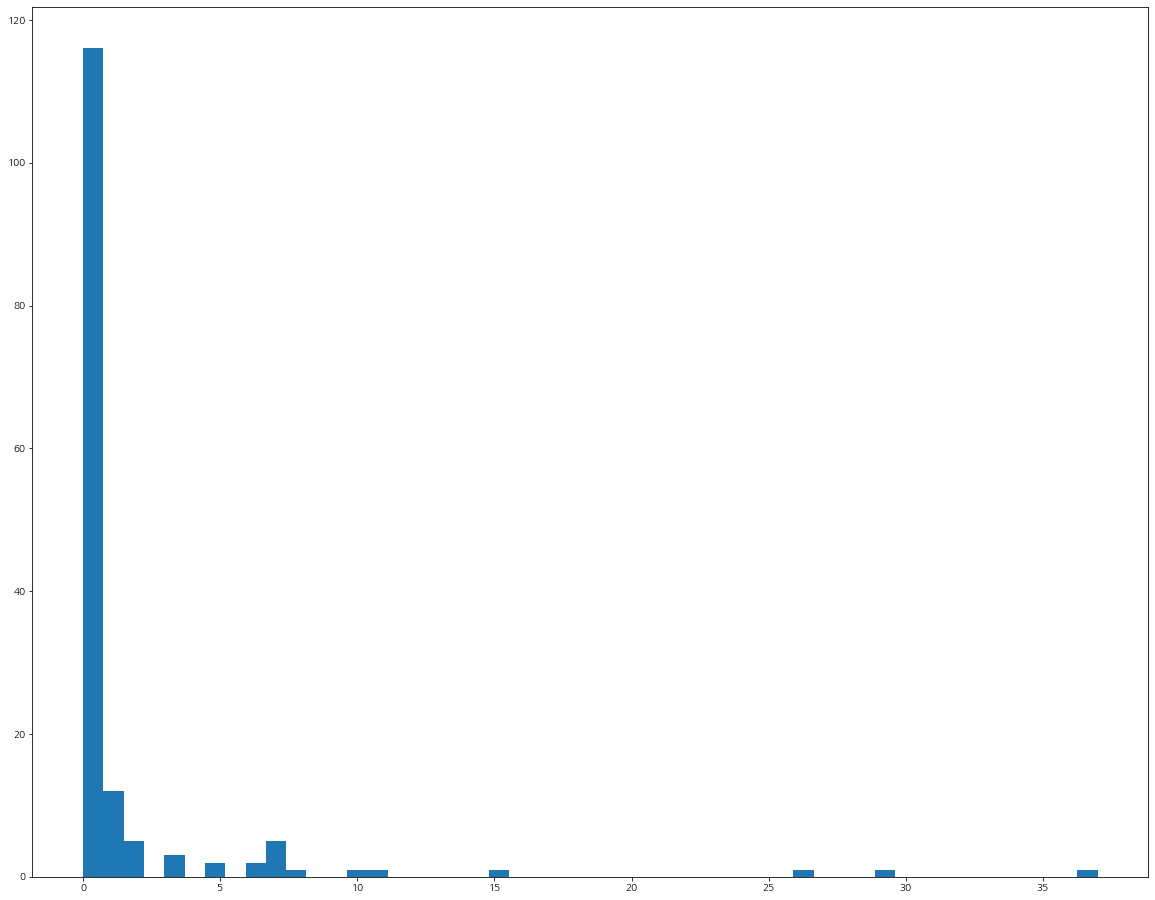

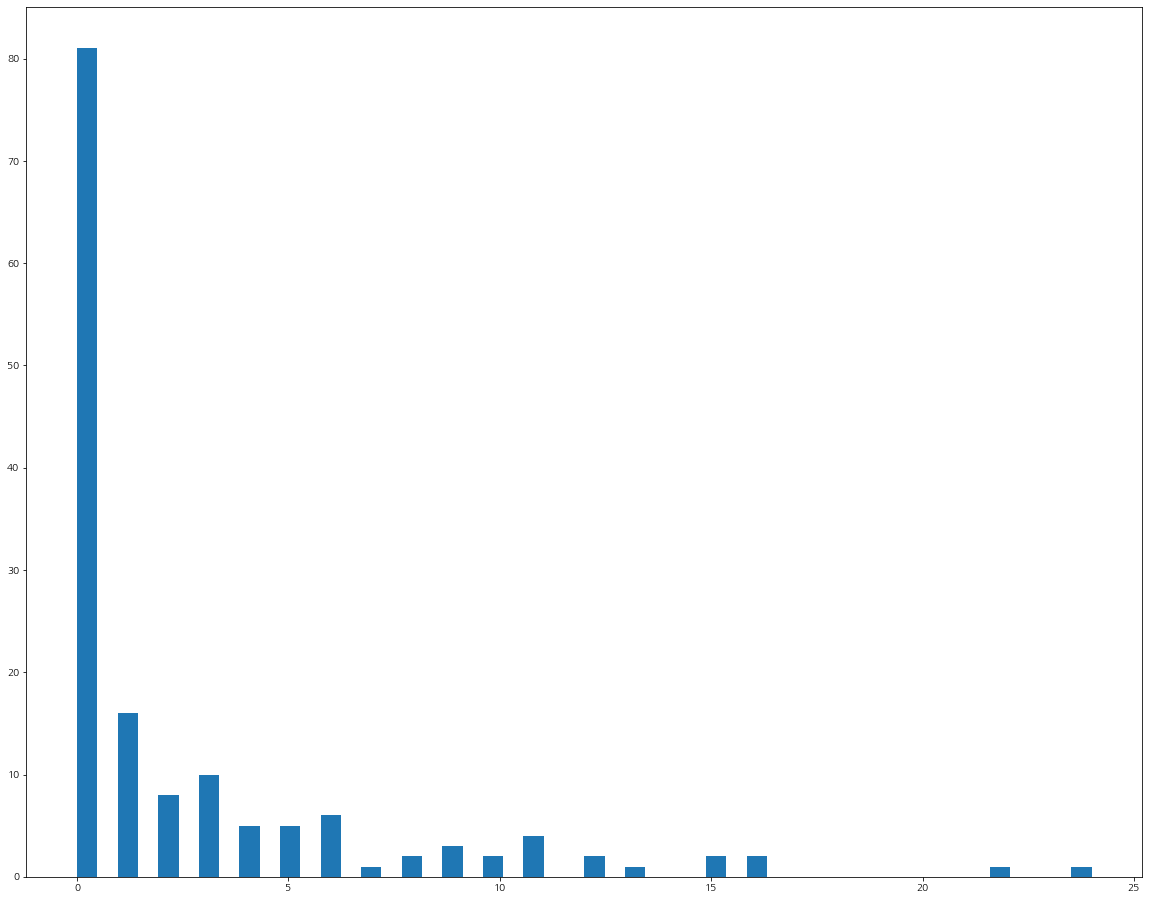

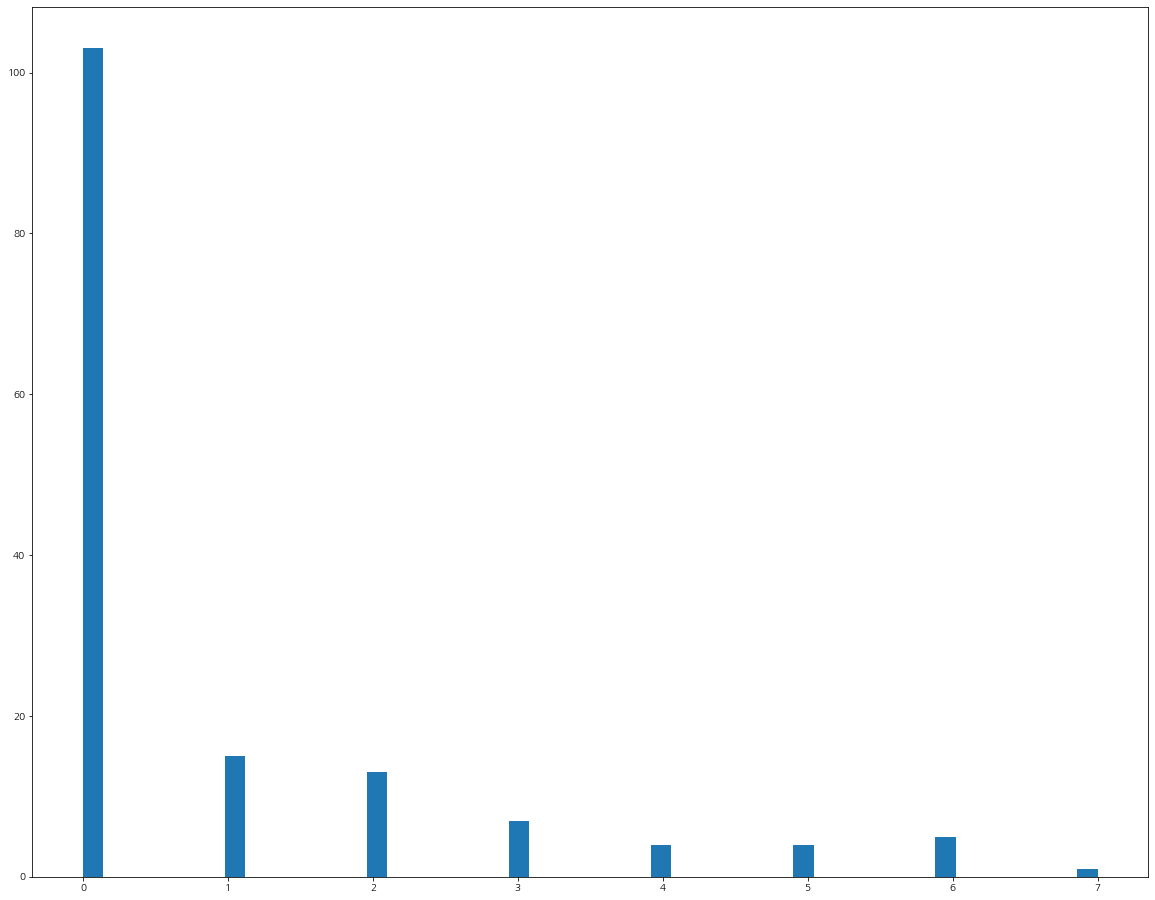

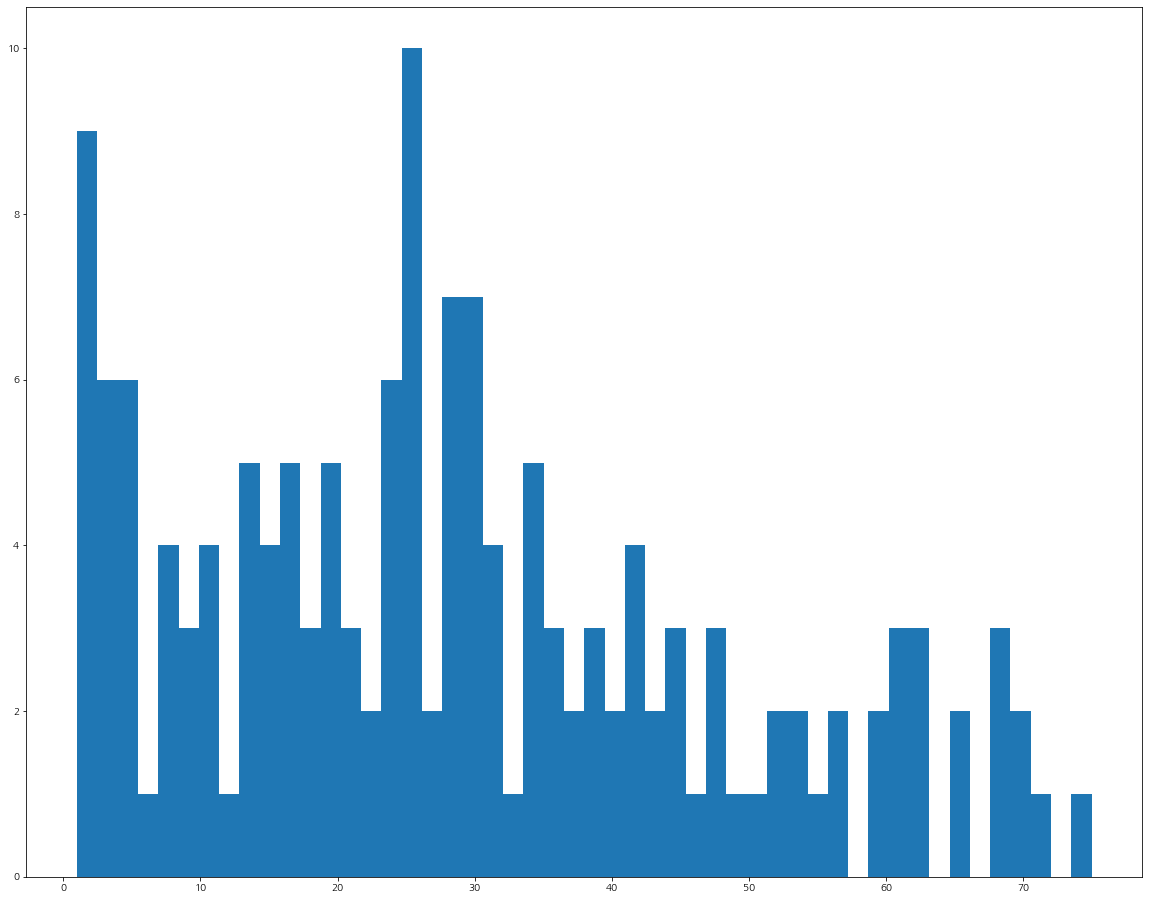

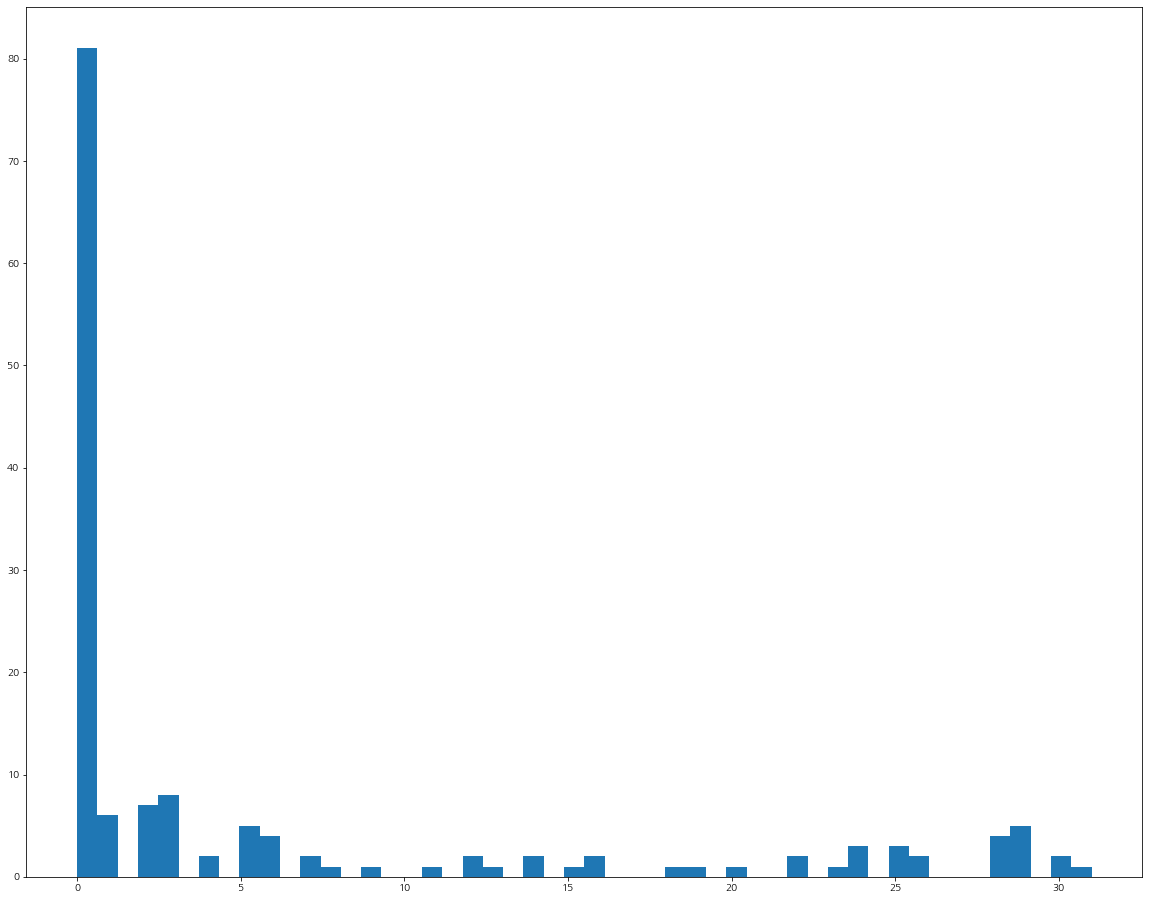

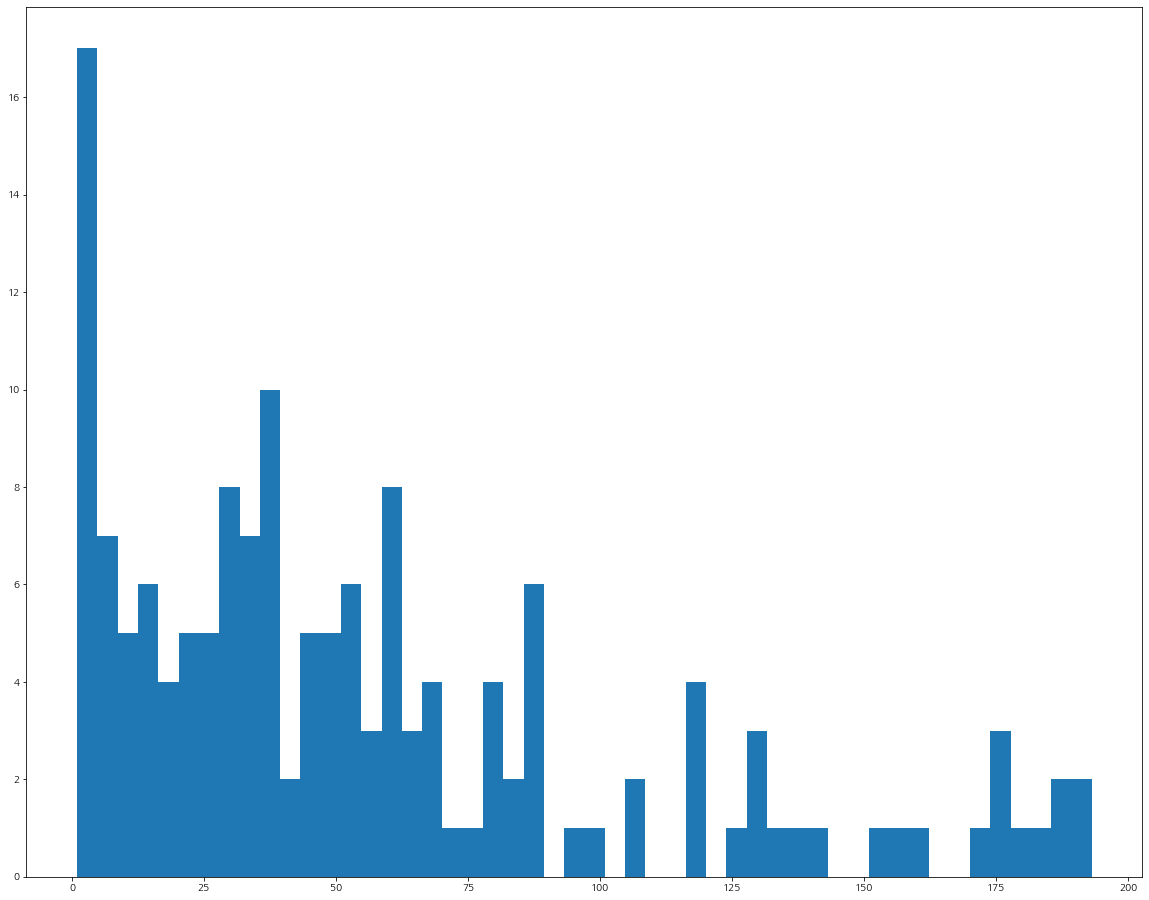

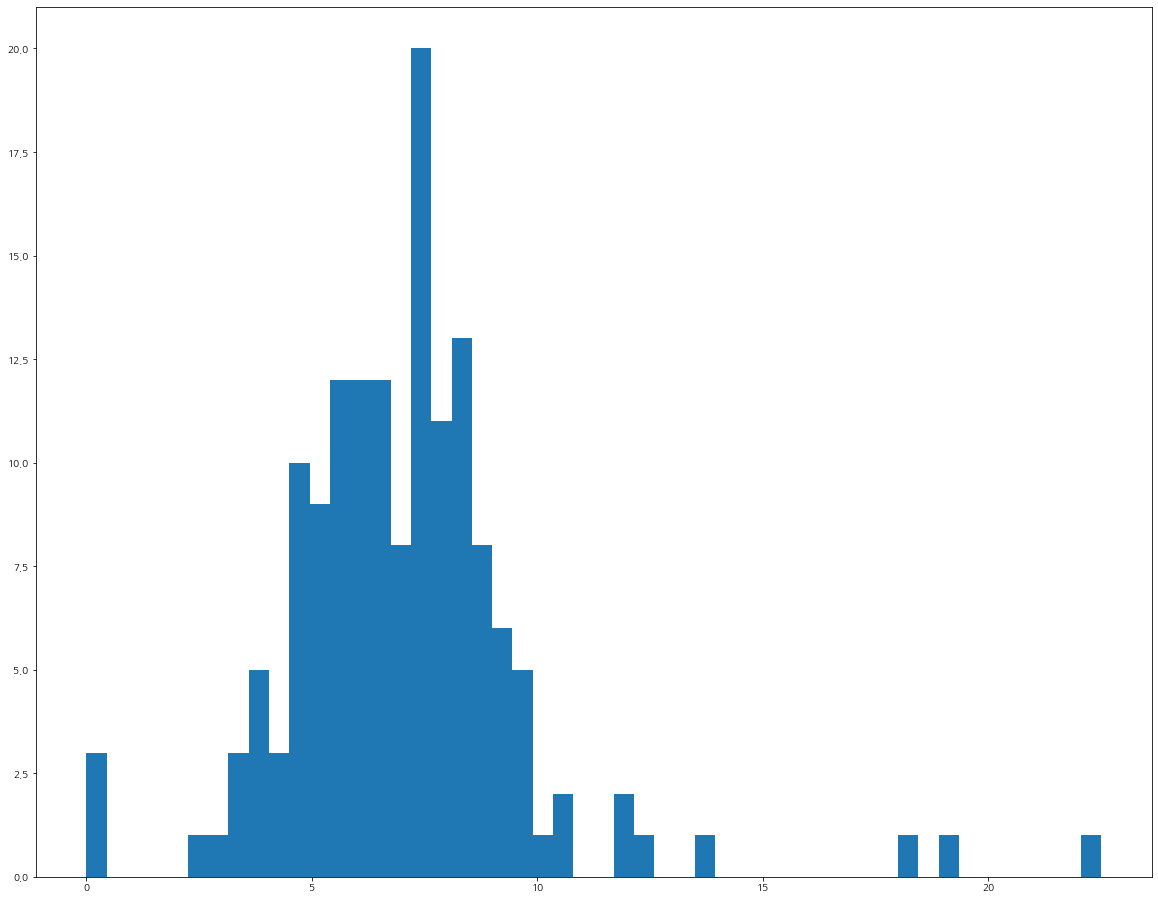

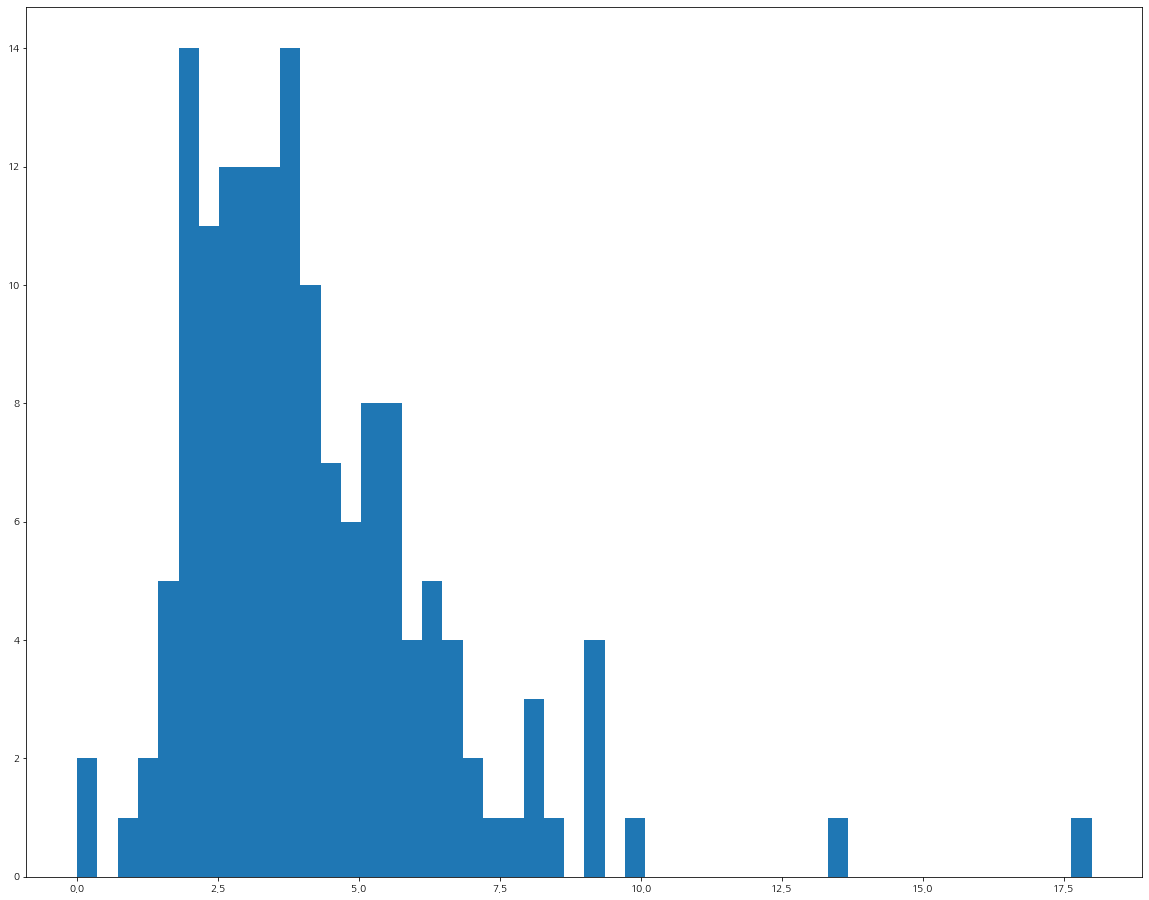

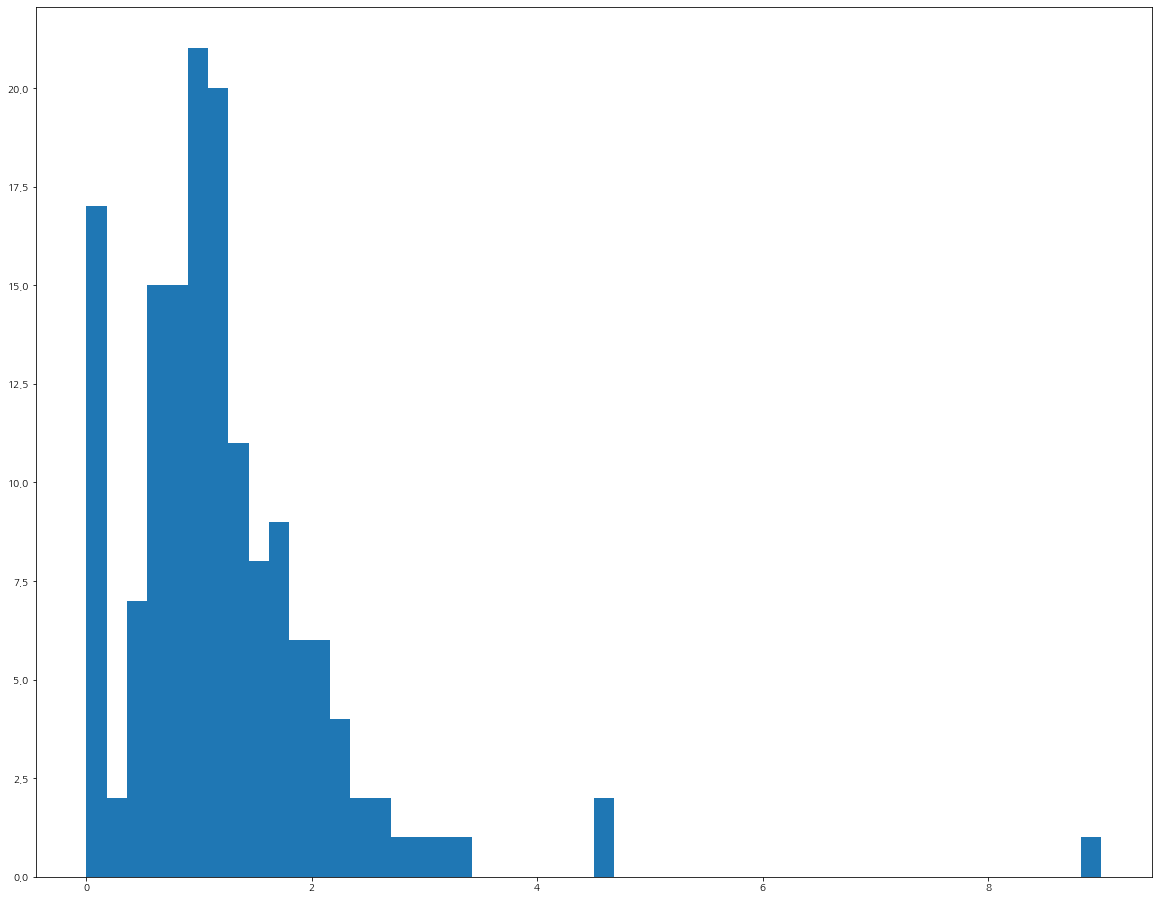

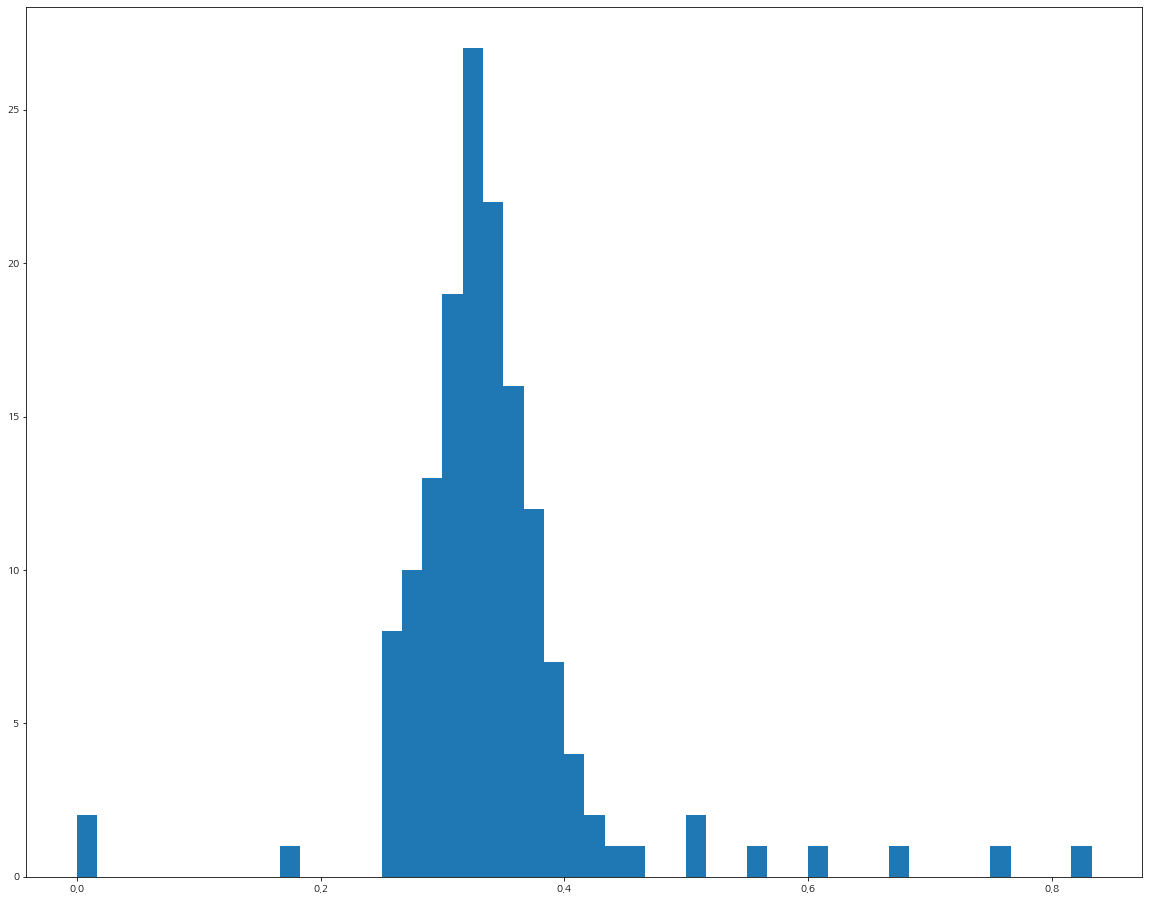

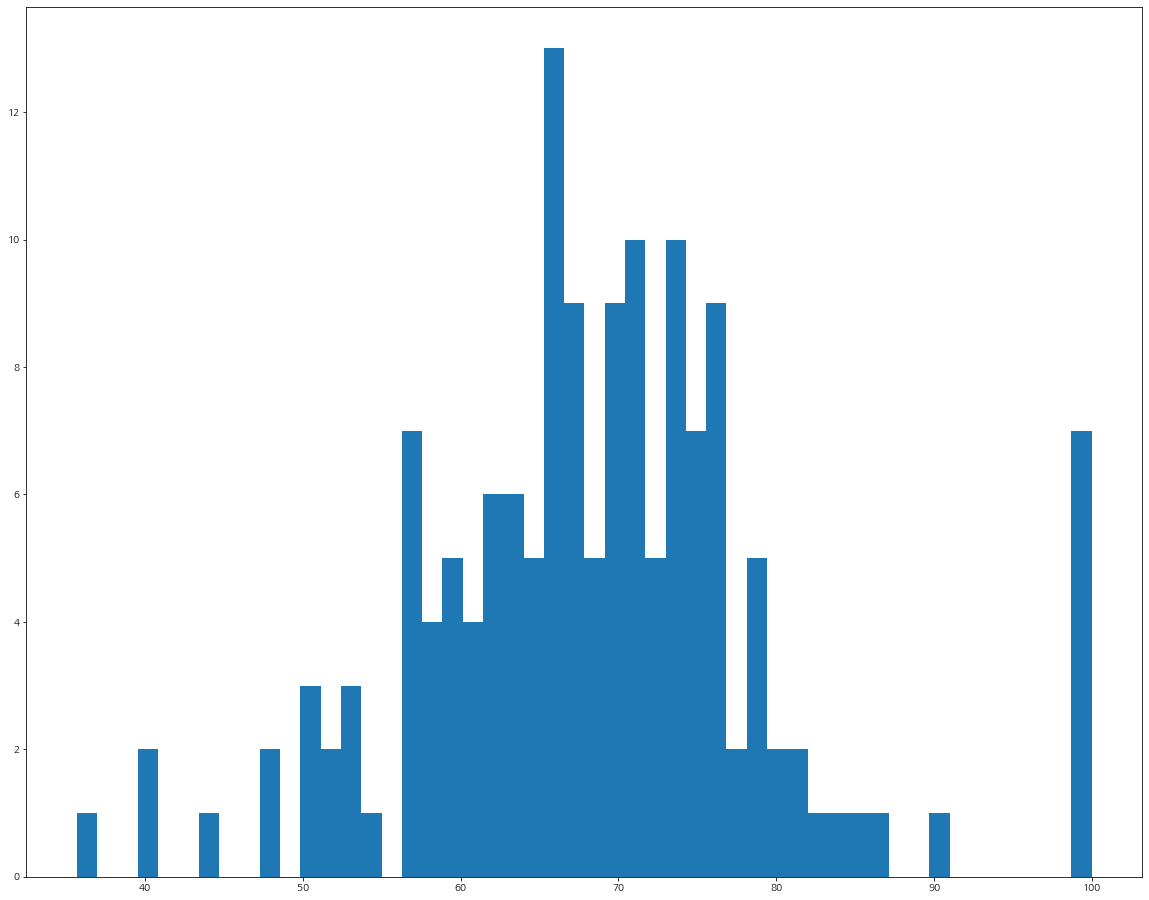

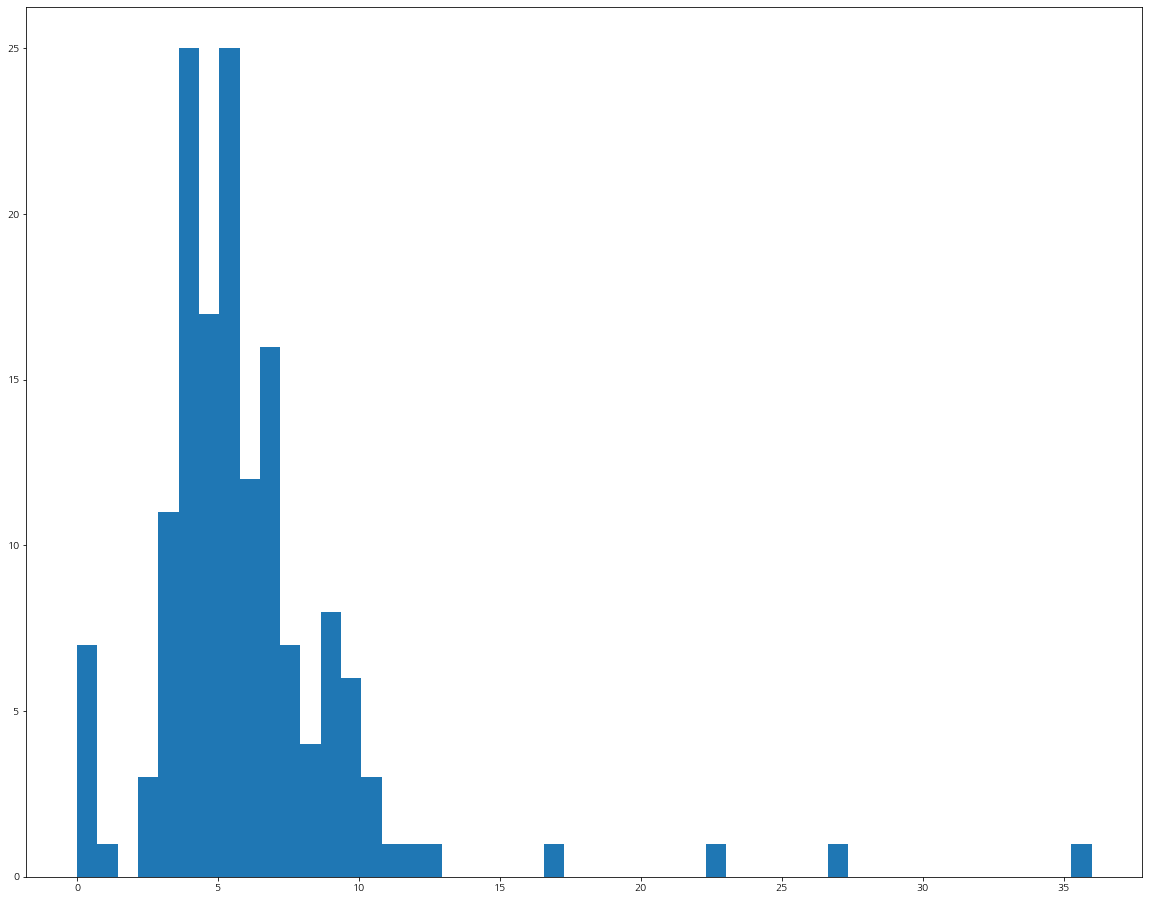

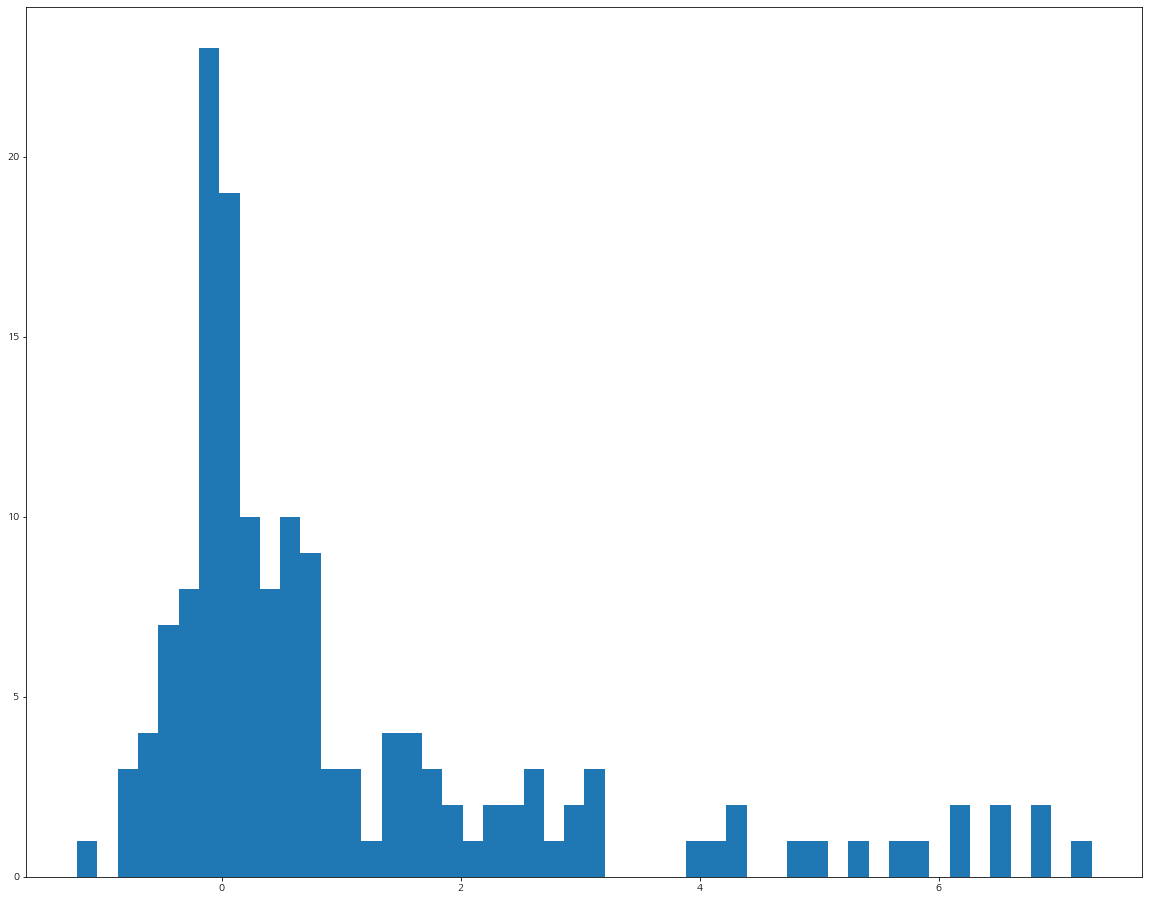

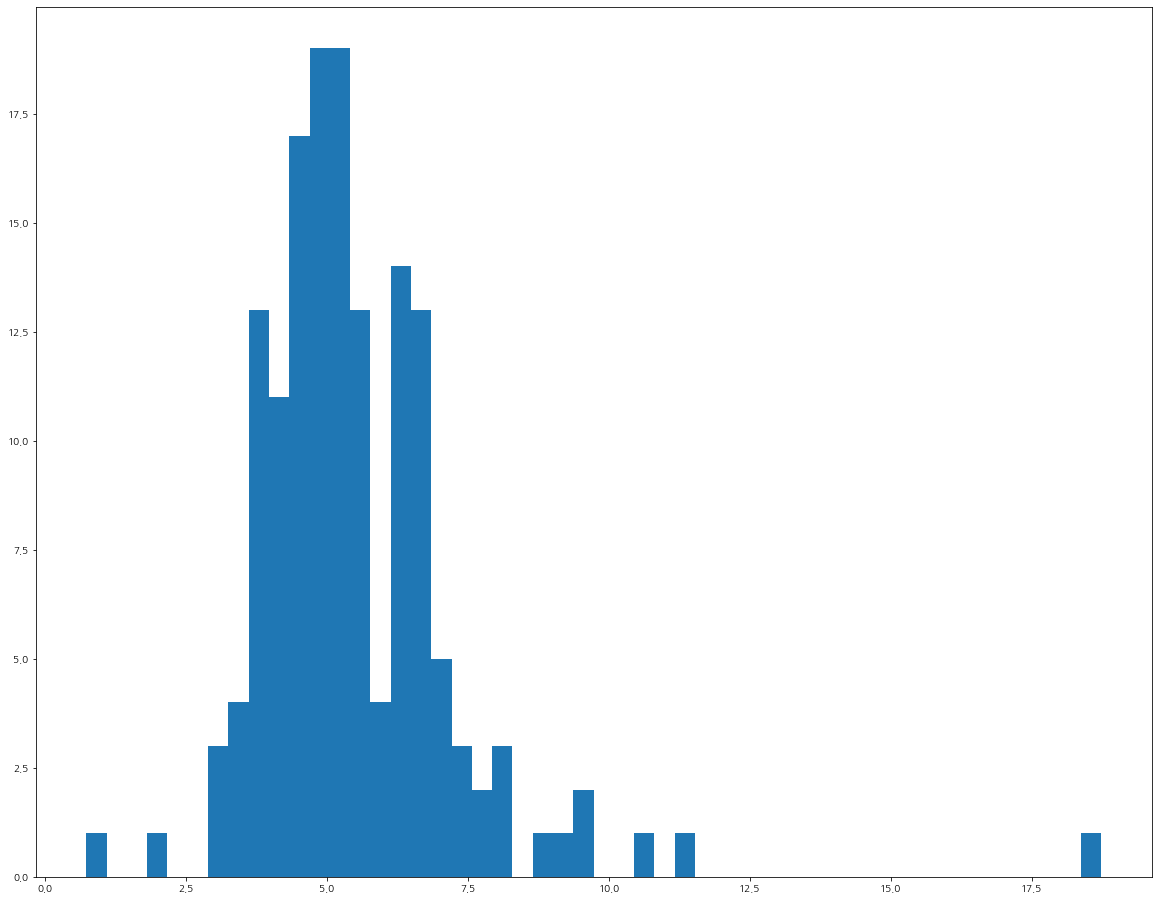

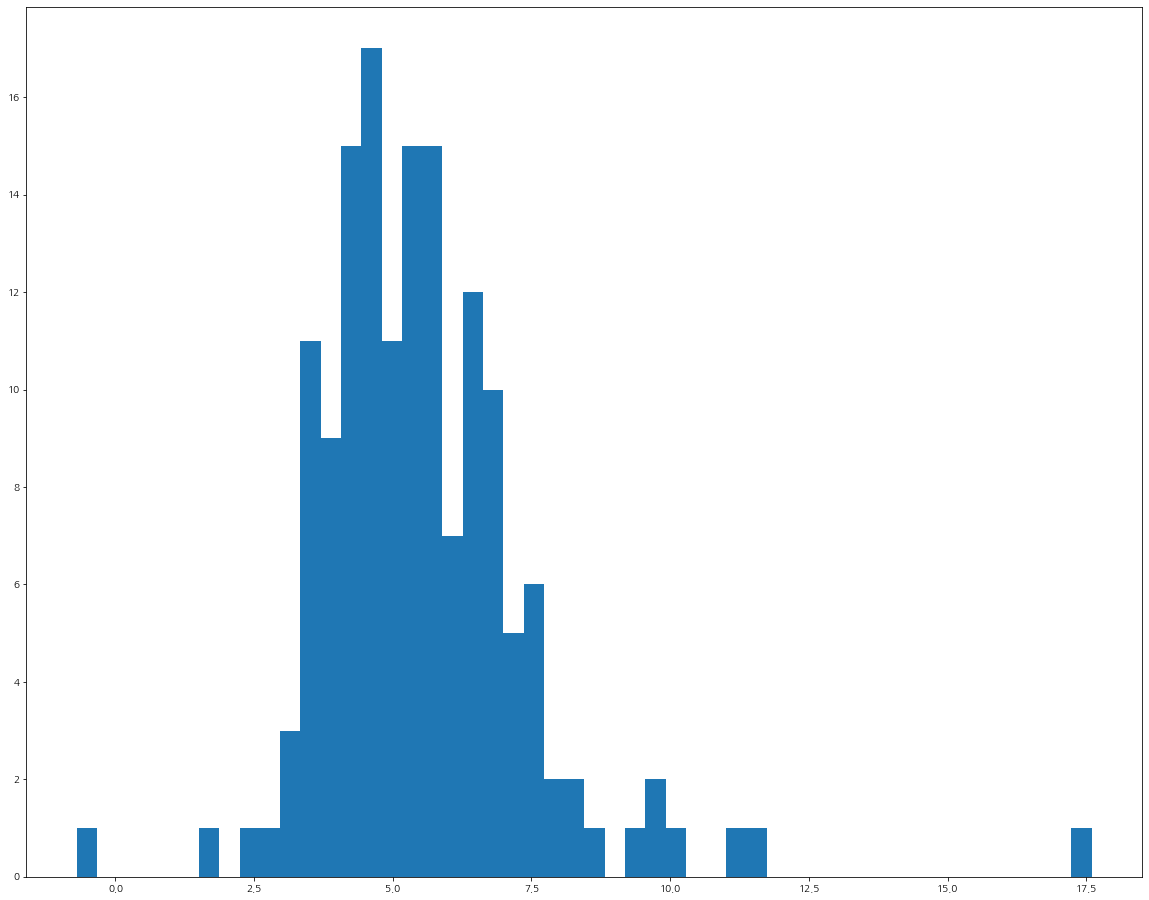

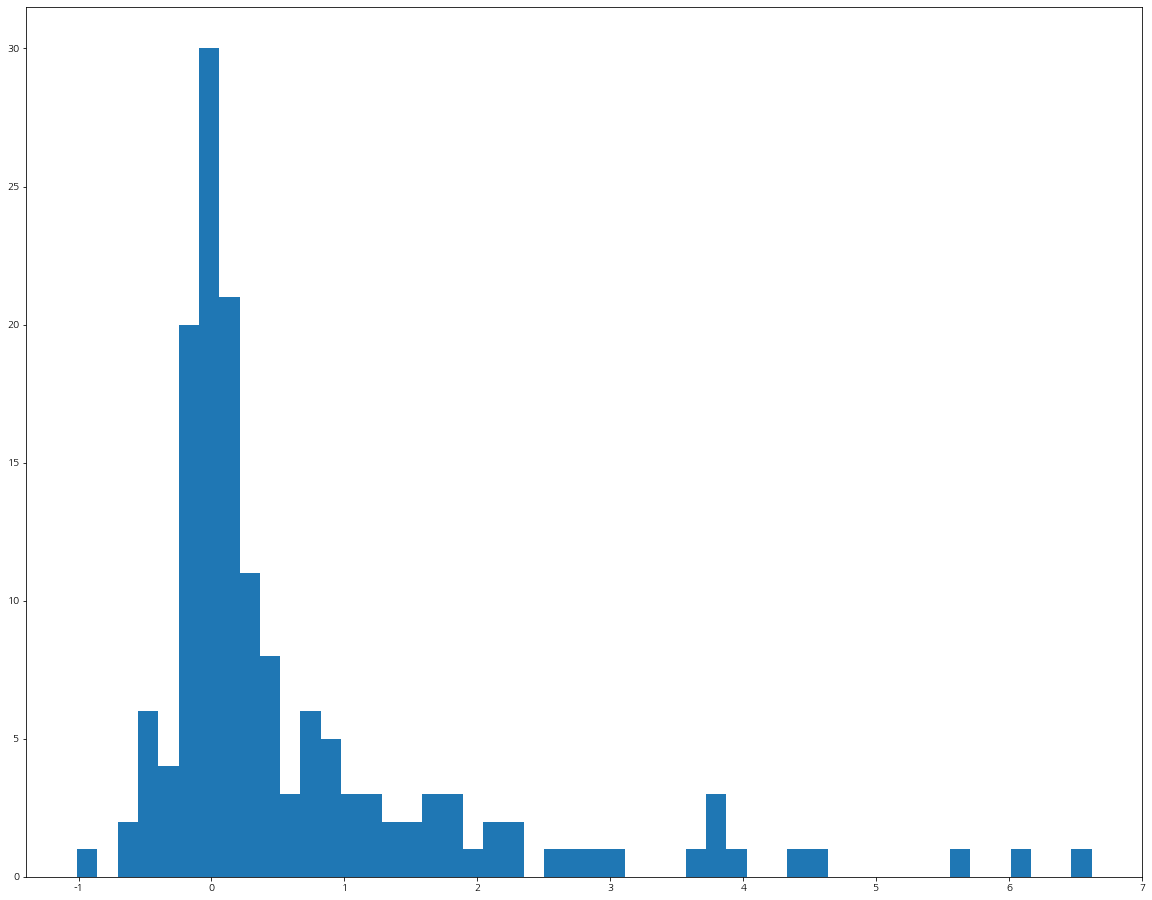

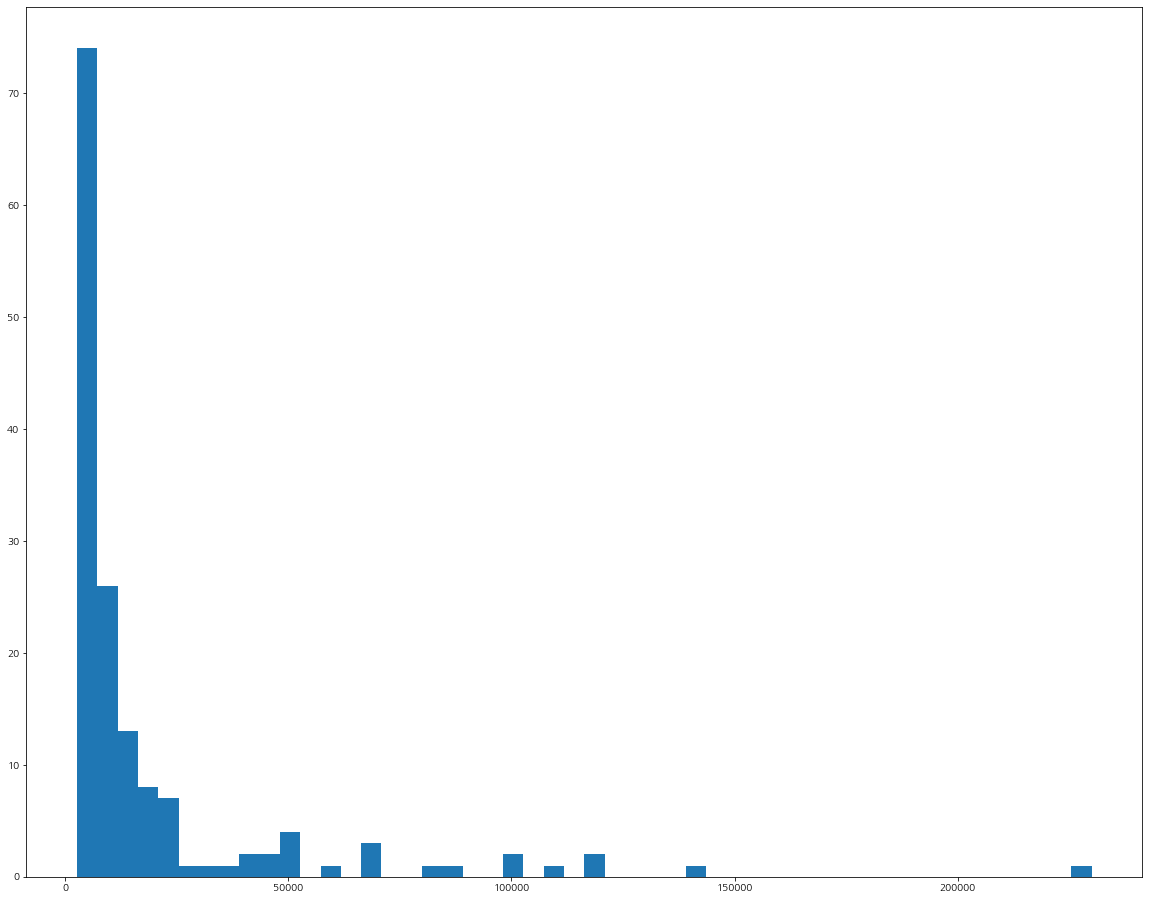

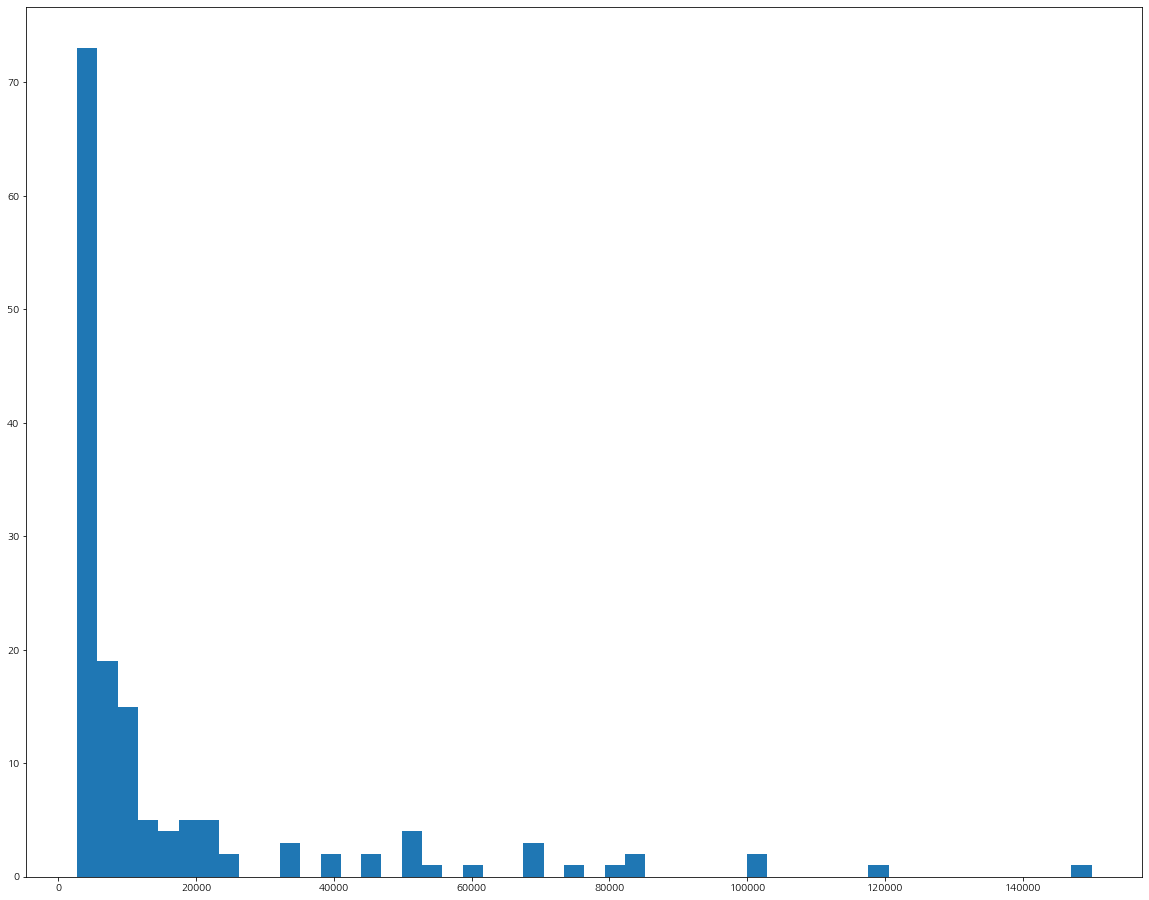

In [123]:
picher_feature_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

# 피처 각각에 대한 히스토그램을 출력한다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 열 개수 만큼의 subplot을 출력한다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,  5, i+1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
        
        plt.show()
        
plot_hist_each_column(picher_features_df)

또 한 가지 그래프를 통해 알 수 있는 것은 각 피처 간의 단위가 다르다는 것이다. 예를 들어 '홈런/9'라는 피처는 x축이 0~8사이의 값인 반면, '이닝'이라는 피처는 0~200 사이의 값을 포함하고 있다. 이러한 데이터는 피처의 정규화 혹은 스케일링이 되어있지 않은 데이터 이다.

### Step2 예측: 투수의 연봉 예측하기

다음 코드에서는 여러 가지 피처 스케일링의 방법 중 표준화 방법을 적용하였다. 표준화는 정규분포에서 z-값을 구하는 과정과 동일하다. z-값은 ((X)-(X의평균) / X의 표준편차로 구한다.

- 피처들의 단위 맞춰주기 : 피처 스케일링

In [124]:
# 판다스 형태로 정의된 데이터를 출력할 때 scientific-notation이 아닌 float 모양으로 출력되게 해준다.

pd.options.mode.chained_assignment = None

# 피처 각각에 대한 스케일링을 수행하는 함수를 정의 한다.

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col]= df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

# 피처 각각에 대한 스케일링을 수행한다.

scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']

picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,3.912893,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,3.266495,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,6.821679,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,2.620098,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,2.975617,2.734705


연속형이 아닌 범주형 피처들은 어떻게 정규화 할 수 있을까요? 범주형 피처에는 **원-핫 인코딩**이라는 방법을 적용해야 한다. 판다스에서는 get_dummies()라는 함수로 간단하게 원-핫 인코딩을 적용 할 수 있다. 다음 실행 결과는 원-핫 인코딩의 적용 결과이다.

- 피처들의 단위 맞춰주기 : 원-핫 인코딩

In [125]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

In [126]:
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


이제 회귀 분석 모델을 학습시킬 준비가 거의 완료되었다. 한 가지 더 준비할 것은 모델의 **학습 데이터셋(학습 전용 데이터셋)과 모델의 테스트 데이터셋(테스트 전용 데이터셋)** 으로 데이터를 분리하는 것이다. 파이썬에서는 sklearn 이라는 train_test_split() 함수로 이를 수행할 수 있다. 다음 코드를 보자.

- 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [127]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리하기

X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)

이제 회귀 분석을 수행하는 코드를 살펴보았다. 다음 코드에서 sklearn 라이브러리의 LinearRegression()으로 모델 오브젝트를 선언한 뒤, 해당 오브젝트에 model=lr.fit(X_train, y_train) 코드를 실행시키자. 그러면 아래의 결과처럼 학습이 완료된 회귀식의 계수를 출력 할 수 있다.

- 회귀 분석 계수 학습 & 학습된 계수 출력

In [128]:
# 회귀 분석 계수를 학습한다. (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력한다.
print(lr.coef_)

[-0.04786627 -0.01346728 -3.04246951 -0.05044684  0.05080696 -0.02414453
 -0.0444572  -0.01692096  0.12795775  0.02903539  0.3320053   2.51036516
 -0.07867911 -0.02883312  0.01454106  0.2460238   0.04107999 -0.09083678
  0.17442938 -0.15504813 -0.00810251  0.0076283   0.6182979   0.027602
  0.04206816  0.11679881 -0.03022142  0.58643087]


### Step 3 평가: 예측 모델 평가하기

회귀 분석은 statsmodel 라이브러리의 OLS 클래스로도 실행이 가능하다. OLS 클래스의 summary() 함수를 사용하면 다음의 실행 결과처럼 계수에 대한 자세한 분석 내용을 살펴볼 수 있다.

- 어떤 피처가 가장 영향력이 강한 피처 일까

In [129]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행한다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           7.70e-42
Time:                        14:46:18   Log-Likelihood:                 3.3433
No. Observations:                 121   AIC:                             49.31
Df Residuals:                      93   BIC:                             127.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0085      0.023     -0.376      0.708      -0.053       0.036
BABIP         -0.0479      0.042     -1.145      0.255      -0.131       0.035
ERA           -0.0135      0.075     -0.179      0.858      -0.163       0.136
FIP           -3.0425      3.048     -0.998      0.321      -9.094       3.009
KIA           -0.0514      0.072     -0.716      0.476      -0.194       0.091
KT             0.0499      0.069      0.723      0.471      -0.087       0.187
LG            -0.0251      0.078     -0.323      0.747      -0.179       0.129
LOB%          -0.0445      0.051     -0.879      0.382      -0.145       0.056
NC            -0.0179      0.086     -0.208      0.836      -0.189       0.153
RA9-WAR        0.1280      0.095      1.351      0.180      -0.060       0.316
SK             0.0281      0.073      0.387      0.699      -0.116       0.172
WAR            0.3320      0.082      4.057      0.000       0.169       0.495
kFIP           2.5104      2.570      0.977      0.331      -2.594       7.615
경기            -0.0787      0.095     -0.824      0.412      -0.268       0.111
두산            -0.0298      0.084     -0.356      0.723      -0.196       0.136
롯데             0.0136      0.083      0.164      0.870      -0.151       0.178
볼넷/9           0.2460      0.203      1.213      0.228      -0.157       0.649
블론             0.0411      0.040      1.023      0.309      -0.039       0.121
삼성            -0.0918      0.080     -1.144      0.256      -0.251       0.068
삼진/9           0.1744      0.235      0.741      0.461      -0.293       0.642
선발            -0.1550      0.177     -0.874      0.384      -0.507       0.197
세             -0.0081      0.042     -0.194      0.847      -0.091       0.075
승              0.0076      0.072      0.107      0.915      -0.135       0.150
연봉(2017)       0.6183      0.041     15.055      0.000       0.537       0.700
이닝             0.0276      0.214      0.129      0.898      -0.398       0.453
패              0.0421      0.063      0.672      0.503      -0.082       0.166
한화             0.1159      0.071      1.641      0.104      -0.024       0.256
홀드            -0.0302      0.053     -0.571      0.569      -0.135       0.075
홈런/9           0.5864      0.542      1.082      0.282      -0.490       1.663
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.59e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

위 실행 결과에서는 결정 계수(R-squared),혹은 수정 결정 계수(Adj, R-squared)라는 점수를 눈여겨볼 필요가 있다. 이 점수들은 회귀 분석이 얼마나 잘 되었는지 평가하는 지표이며, '회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?'에 대한 점수이다. 이 점수들이 1에 가까울수록 데이터를 잘 설명하는 모델이다. 다음으로 F 통계량 (F-statistic)은 회귀식의 유의성 검정에 사용되는 값으로 P-value 인 Prob(F-statistc)수치와 함게 살펴봐야 한다. 일반적으로 P-value가 0.05 이하면 'F 통계량이 유의한 의미를 가진다' 라는 결론을 내려도 무방하며 이는 회귀 분석이 유의미한 결과를 가진다는 것이다. 또한 표의 P>t 라는 정보는 각 피처의 검정 통계량(t-statistics)이 얼마나 유의미한지에 대한 p-value를 나타낸는 것이다. 

- 어떤 피처가 가장 영향력이 강한 피처일까

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

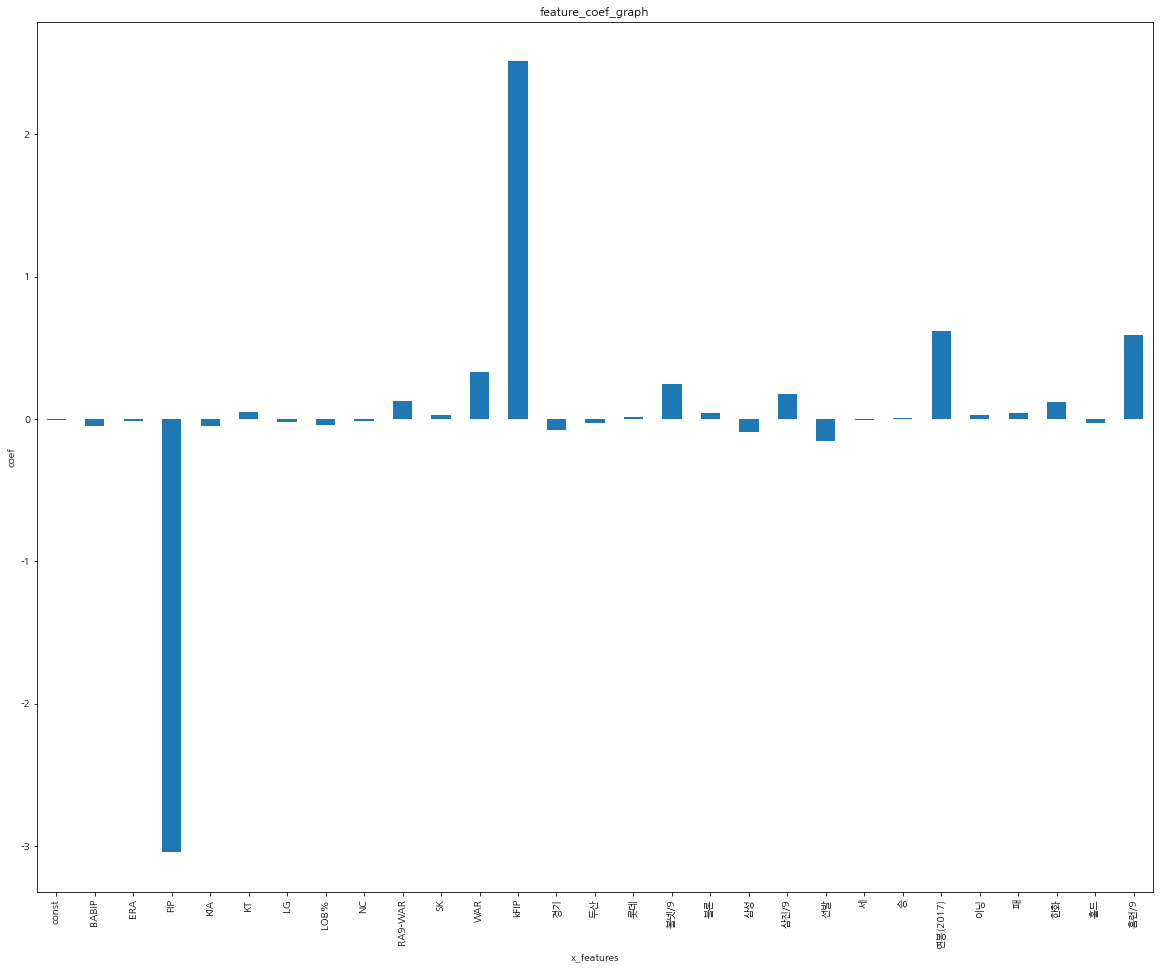

In [130]:
# 회귀 계수를 리스트로 반환한다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환 한다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

이에 대한 위 코드의 시각화 결과 FIP, WAR, 홈런, 작년 연봉 피처가 가장 영량력이 큰것으로 보인다. 다음으로 아래의 출력 결과는 수정 결정 계수(R2 score)를 sklean의 LineaarRegression 클래스로 출력해 보자.

 - 예측 모델의 평가하기 : R2 score

In [131]:
# 학습 데이터와 테스트 데이터로 분리한다.

X= picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 모델을 학습하자
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가한다.
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

0.9276949405576704
0.8860171644977818


실행 결과의 각 값은 학습 데이터셋과 테스트 데이터셋에 대한 평가 점수를 의미하며, 이 두 점수는 최대한 벌어지지 않는 것이 좋다. 만약 학습 점수가 테스트 점수에 비해 높다면 과적합이 발생한 것이다. 모의고사에만 특화된 공부를 한 나머지, 실제 시험의 새로운 유형에 적응하지 못하는 경우라고 비유할 수 있다. 회귀 모델을 평가할 때는 RMSE score라는 측정 지표를 활용할 수도 있다. 이 점수는 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것이다. 이 값이 높으면 높을수록 예측이 부정확하다는 것의 의미한다. 다음 코드는 RMSE score를 출력한 것이다.

- 예측 모델의 평가하기 : RMSE score

In [132]:
# 회귀 분석 모델을 평가한다
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력

0.23537641149363747
0.462519632997063


이번에는 피처들의 상관 관계를 살펴보기 위해 heatmap 방식의 시각화를 사용하겠다. 이를 통해 승-이닝, kFIP-FIP, RA9_WAR-WAR 등의 피처 쌍에서 높은 연관성을 발견할 수 있다.

- 피처들의 상관 관계 분석하기

In [140]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산한다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화한다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

KeyError: "['연봉(2018)'] not in index"